In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/database.db')

In [3]:
df = pd.read_sql_query('SELECT * FROM loanDev JOIN (select * from account JOIN district where account.districtId = district.id) as A where loanDev.accountId = A.id;', con)
df.head()

,id,accountId,date,amount,duration,payments,status,id,districtId,frequency,...,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96
0,5314,1787,930705,96396,12,8033,-1,1787,30,weekly issuance,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,5316,1801,930711,165960,36,4610,1,1801,46,monthly issuance,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,6863,9188,930728,127080,60,2118,1,9188,45,monthly issuance,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,5325,1843,930803,105804,36,2939,1,1843,12,monthly issuance,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,7240,11013,930906,274740,60,4579,1,11013,1,weekly issuance,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


In [4]:
df = df.drop(['id', 'accountId', 'payments', 'districtId', 'frequency'], axis=1)
df.head()

,date,amount,duration,status,date,id:1,districtName,region,nInhabitants,nMunicipalitiesSub499Inhabitants,...,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96
0,930705,96396,12,-1,930322,30,Sokolov,west Bohemia,94812,15,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,930711,165960,36,1,930213,46,Nachod,east Bohemia,112709,48,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,930728,127080,60,1,930208,45,Jicin,east Bohemia,77917,85,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,930803,105804,36,1,930130,12,Pribram,central Bohemia,107870,84,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,930906,274740,60,1,930214,1,Hl.m. Praha,Prague,1204953,0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


In [5]:
df.describe()

,amount,duration,status,id:1,nInhabitants,nMunicipalitiesSub499Inhabitants,nMunicipalities500to1999Inhabitants,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes96
count,328.000000,328.000000,328.000000,328.000000,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,145308.621951,35.853659,0.719512,36.960366,2.888467e+05,39.240854,21.698171,5.432927,1.649390,5.219512,68.649390,9593.338415,3.474451,122.759146,17974.329268
std,105247.318098,16.734752,0.695541,25.242099,3.779662e+05,34.850137,16.369876,4.441438,1.070425,2.886325,20.573455,1359.232577,2.211972,23.951657,33065.392486
min,4980.000000,12.000000,-1.000000,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.430000,81.000000,888.000000
25%,68328.000000,24.000000,1.000000,12.750000,9.208400e+04,5.000000,7.000000,2.000000,1.000000,4.000000,53.000000,8552.250000,1.860000,107.000000,2291.750000
50%,114804.000000,36.000000,1.000000,38.000000,1.252360e+05,34.000000,23.000000,5.000000,1.000000,5.000000,62.000000,9019.500000,3.490000,115.500000,3891.000000
75%,198600.000000,48.000000,1.000000,62.000000,2.268035e+05,63.000000,35.000000,8.000000,2.000000,7.000000,88.250000,9951.250000,4.790000,140.000000,9208.000000
max,538500.000000,60.000000,1.000000,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,9.400000,167.000000,99107.000000


<AxesSubplot:>

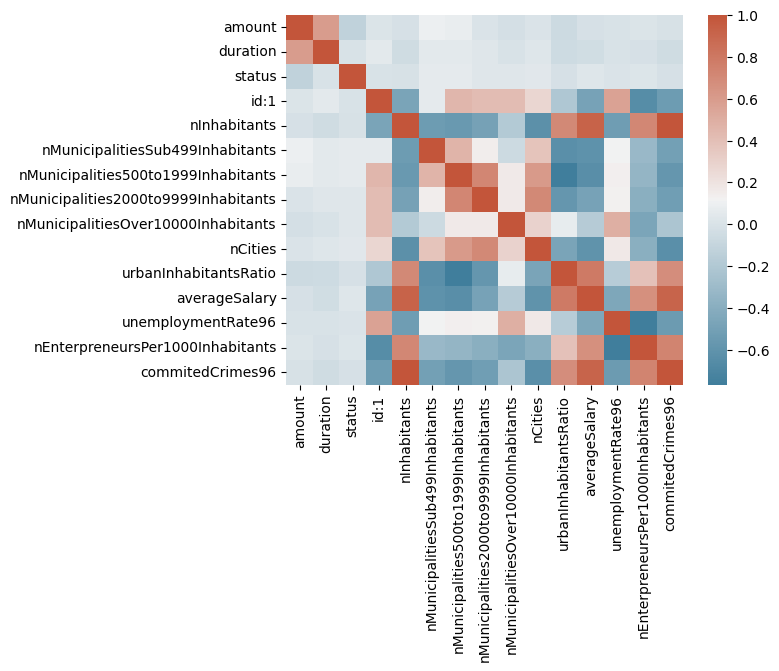

In [6]:
sns.heatmap(df.corr(), cmap=sns.diverging_palette(230, 20, as_cmap=True))

<AxesSubplot:xlabel='districtName', ylabel='count'>

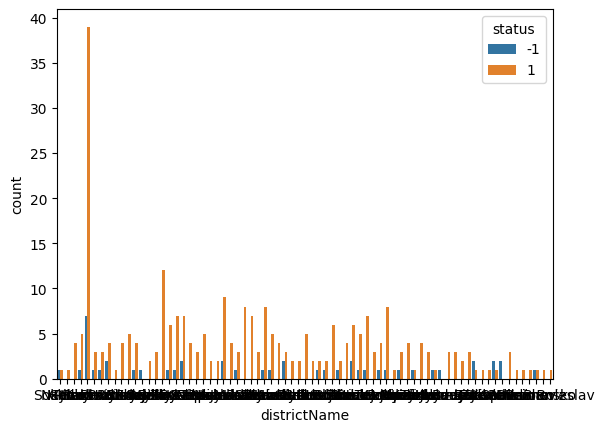

In [7]:

sns.countplot(df, x='districtName', hue='status')

In [42]:
district_df = df.copy()
district_df['status'] = (district_df['status']+1)/2 # Transform status from -1/1 to 0/1 to improve plot
district_df = district_df.groupby('districtName') \
                         .agg(count=('districtName', 'count'), mean_status=('status', 'mean'), median_status=('status', 'median')) \
                         .reset_index()
district_df = district_df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
district_df.head()

,districtName,count,mean_status,median_status
0,Hl.m. Praha,46,0.847826,1.0
1,Zlin,12,1.000000,1.0
2,Ostrava - mesto,11,0.818182,1.0
3,Brno - mesto,9,0.777778,1.0
4,Olomouc,9,0.888889,1.0


In [43]:
district_df.describe()

,count,mean_status,median_status
count,73.000000,73.000000,73.000000
mean,4.493151,0.844001,0.904110
std,5.543072,0.246492,0.272049
min,1.000000,0.000000,0.000000
25%,2.000000,0.750000,1.000000
50%,3.000000,1.000000,1.000000
75%,5.000000,1.000000,1.000000
max,46.000000,1.000000,1.000000


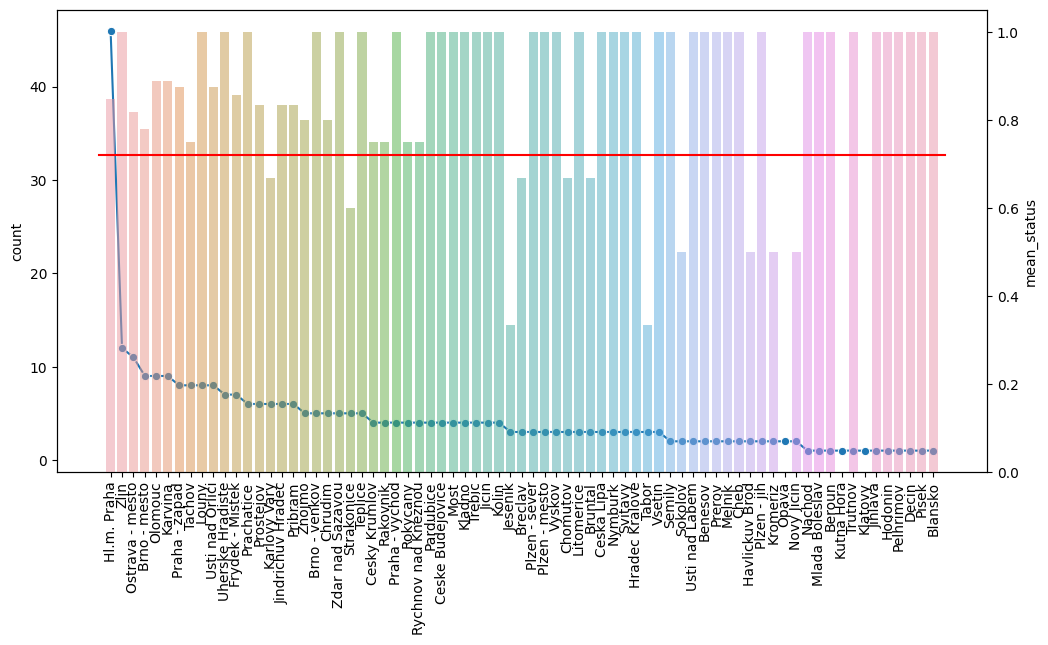

In [44]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=district_df['count'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

plot = sns.barplot(y='mean_status', x='districtName', data=district_df, alpha=0.5, ax=ax2)
plt.setp(ax1.get_xticklabels(), rotation=90)

plt.plot([-1,73],[0.719512, 0.719512], color='r')
print()